# Largest empty circle inside quadrant

In this variation the entire circle must be inside the quadrant, not just its center

Consequently, the center of the circle need not be in one of the vertices of the Voronoi diagram of the points, but the Voronoi diagram can still be used to validate all candidates and keep everything O(n log n).

Caveats:
* Quick and rough experiment. Not rigorously verified or tested. Might have missed cases or serious faults.
* Non-vectorised, slow Python looping. Probably best written in C++ or Rust for speed.

In [1]:
from largest_empty_circle import largest_empty_circle_inside_quadrant, Quadrant, Circle

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import voronoi_plot_2d

In [2]:
def enlarge(r, a):
    d = r[1] - r[0]
    rmin = r[0] - 0.5 * a * d
    rmax = r[1] + 0.5 * a * d
    return rmin, rmax


def showcase(points,
             q: Quadrant,
             show_voronoi=False,
             show_candidates=False,
             label_points=False):
    
    if isinstance(points, int):
        points = np.random.uniform(size=(points, 2),
                                   low=(0, 0),
                                   high=q)
    else:
        assert (points >= 0).all()
        assert (points[:,0] <= q[0]).all()
        assert (points[:,1] <= q[1]).all()
    
    got = largest_empty_circle_inside_quadrant(q, points,
                                               return_voronoi=show_voronoi,
                                               return_candidates=show_candidates)
    if show_voronoi:
        result, voronoi = got
        somevor = voronoi
    else:
        result = got
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    if show_voronoi:
        voronoi_plot_2d(voronoi, ax=ax)
    else:
        ax.scatter(points[:,0],
                   points[:,1],
                   5,
                   color='b')
        
    if label_points:
        for i, p in enumerate(points):
            ax.annotate(str(i), p)


    rect = plt.Rectangle((0, 0), q[0], q[1], color='pink', fill=None)
    ax.add_patch(rect)

    if show_candidates:
        result = list(result)
        for c in result:
            circ = plt.Circle(c.c, c.r, color='y', fill=None)
            ax.add_patch(circ)
        c = max(result, key=lambda c: c.r)
        circ = plt.Circle(c.c, c.r, color='g', fill=None)
        ax.add_patch(circ)
    else:
        c = result
        circ = plt.Circle(c.c, c.r, color='y', fill=None)
        ax.add_patch(circ)
        if c.r > 0.05:
            circ2 = plt.Circle(c.c, 0.05, color='y', fill=None)
            ax.add_patch(circ2)
        if c.r > 0.01:
            circ3 = plt.Circle(c.c, 0.01, color='y', fill=None)
            ax.add_patch(circ3)

    lim = enlarge((np.zeros(2), q) , 0.1)
    plt.xlim([lim[0][0], lim[1][0]])
    plt.ylim([lim[0][1], lim[1][1]])
    plt.show()

Except for a special case where the circle can extend over the entire smaller dimension of the rectangle,
the largest circle needs to touch 3 obstacles or there would be a larger one.

This can happen in different ways.

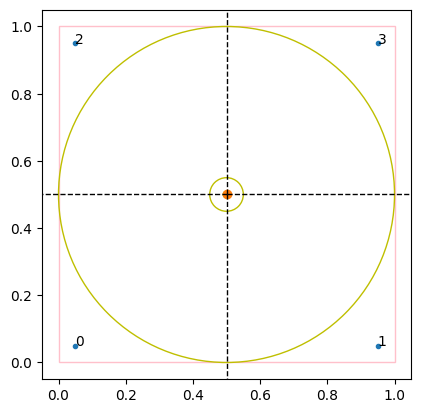

In [3]:
# extending over both dimensions
np.random.seed(10)
showcase(np.array([
    [0.05, 0.05],
    [0.95, 0.05],
    [0.05, 0.95],
    [0.95, 0.95]
]), [1, 1], label_points=True, show_voronoi=True)

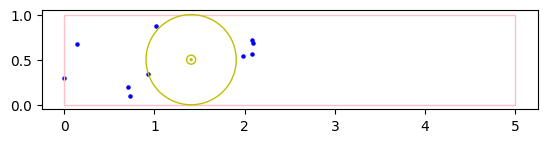

In [4]:
# extending over entire smaller dimension
# there are infinite many of which the leftmost is shown
np.random.seed(1)
showcase(10, [5, 1])

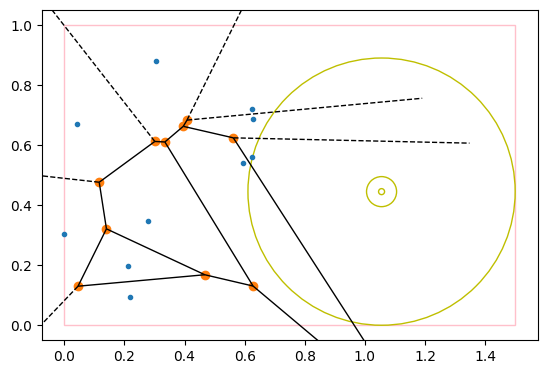

In [5]:
# Cornered against two edges of the rectangle, touching one point, centered somewhere in its Voronoi region
np.random.seed(1)
showcase(10, [1.5, 1], show_voronoi=True)

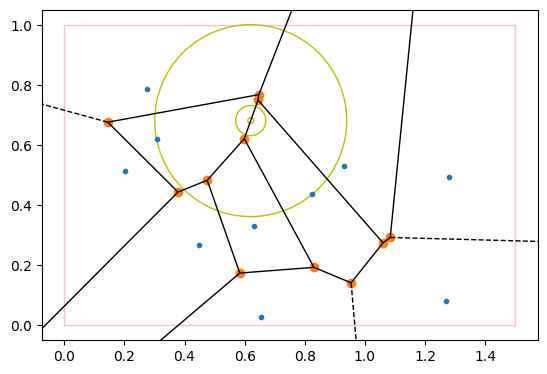

In [6]:
# Centered on one of the ridges of the voronoi diagram, touching 2 points and one of the 4 edges of the rectangle
np.random.seed(2)
showcase(10, [1.5, 1], show_voronoi=True)

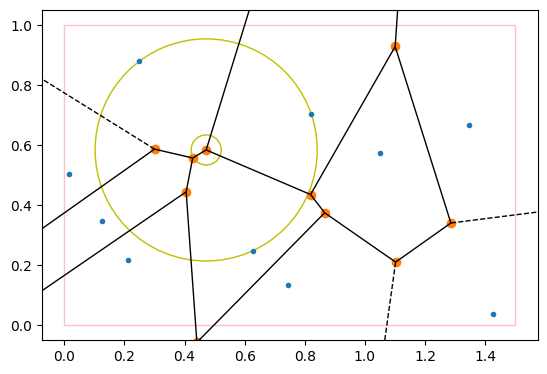

In [7]:
# Centered on one of the vertices of the voronoi diagram, if it touches 3 points
np.random.seed(9)
showcase(10, [1.5, 1], show_voronoi=True)

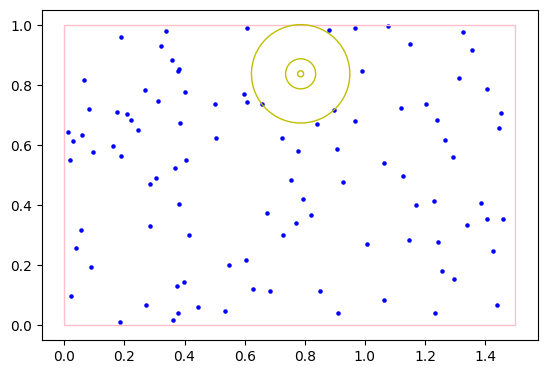

In [8]:
# more points, touching an edge and 2 points
np.random.seed(6)
showcase(100, [1.5, 1])

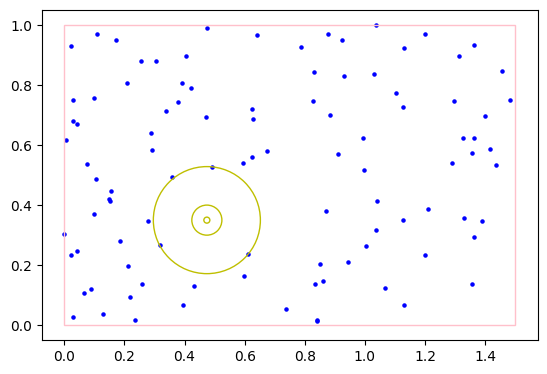

In [9]:
# more points, touching 3 points
np.random.seed(1)
showcase(100, [1.5, 1])

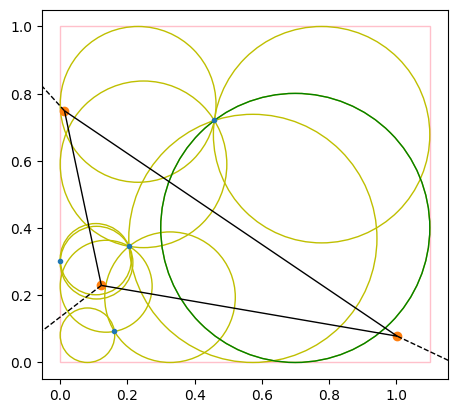

In [10]:
# all candidates, with largest in green
np.random.seed(1)
showcase(4, [1.1, 1], show_voronoi=True, show_candidates=True)